In [19]:
# Day 9: Model Interpretation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load data & model outputs from Day 8
X = pd.read_csv(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\outputs/X_features.csv")
y = pd.read_csv(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\outputs/y_target.csv")
rf_model = pd.read_pickle(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\outputs/rf_tuned.pkl")
xgb_model = pd.read_pickle(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\outputs/xgb_tuned.pkl")


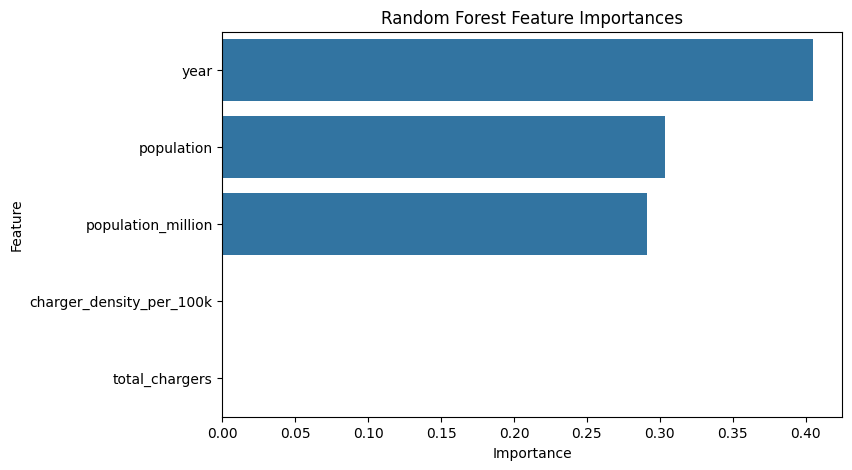

In [20]:
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Random Forest Feature Importances")
plt.show()


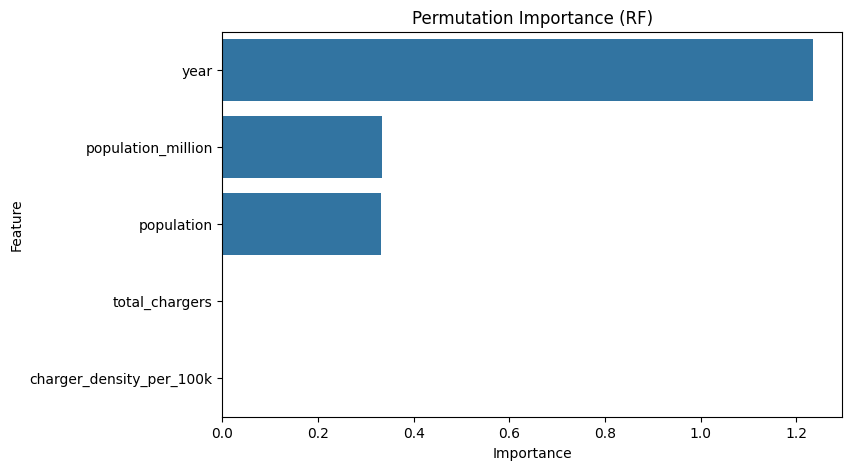

In [21]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf_model, X, y, n_repeats=20, random_state=42)

perm_imp = pd.DataFrame({"Feature": X.columns, "Importance": perm.importances_mean})
perm_imp = perm_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=perm_imp)
plt.title("Permutation Importance (RF)")
plt.show()


Defaulting to user installation because normal site-packages is not writeable


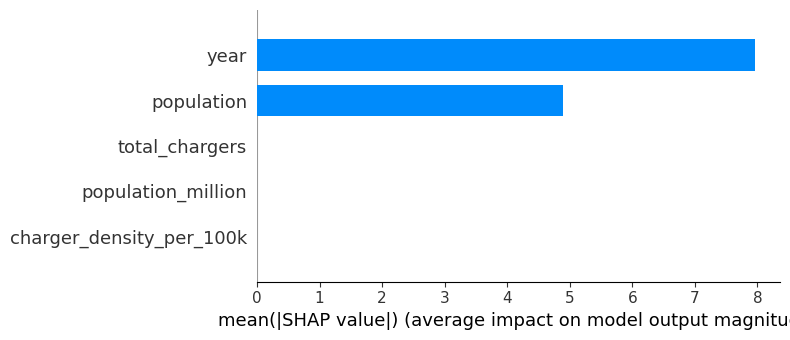

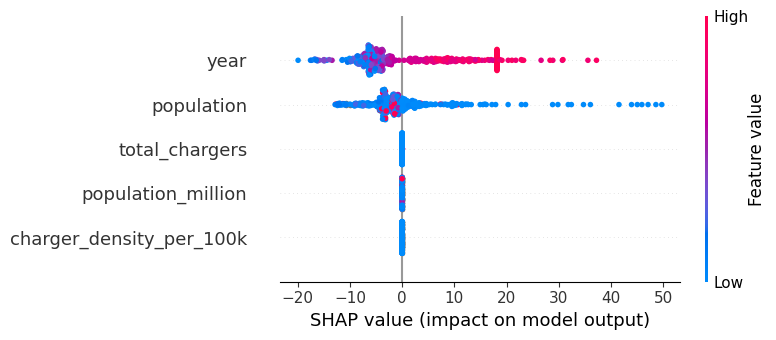

In [24]:
!pip install shap
import shap

# Init explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X, plot_type="bar")
shap.summary_plot(shap_values, X)


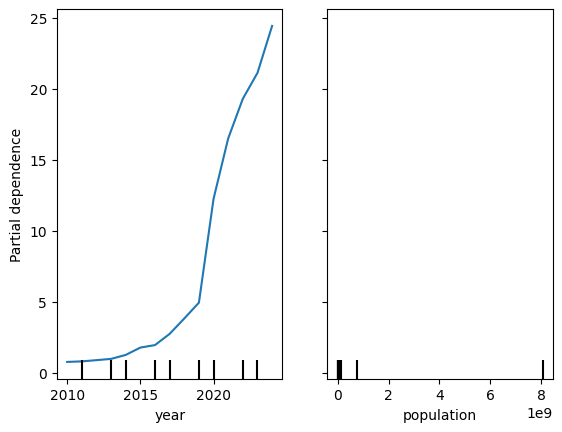

In [25]:
from sklearn.inspection import PartialDependenceDisplay

# Example with 2 important features
features_to_plot = [0, 1]  # index of top 2 features
PartialDependenceDisplay.from_estimator(rf_model, X, features_to_plot, kind="average")
plt.show()


In [ ]:
feat_imp.to_csv(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\outputs/day9_rf_feature_importance.csv", index=False)
perm_imp.to_csvr("C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\outputs/day9_permutation_importance.csv", index=False)
